In [1]:
from skimage.metrics import structural_similarity as ssim 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
import cv2

In [2]:
def mse(imageA, imageB):
    err=np.sum((imageA.astype("float")-imageB.astype("float"))**2) 
    err /=float(imageA.shape[0] * imageA.shape[1])
    return err

In [3]:
def compare_image(imageA, imageB, title):
    m=mse(imageA, imageB)
    s=ssim(imageA, imageB)
    fig=plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m,s))

    #show first image
    ax=fig.add_subplot(1,2,1)
    plt.imshow(imageA,cmap=plt.cm.gray)
    plt.axis("off")

    #show the second image
    ax=fig.add_subplot(1,2,2)
    plt.imshow(imageB,cmap=plt.cm.gray)
    plt.axis("off")

    plt.show()

In [4]:
#Loading the images
imag1=cv2.imread('cat1.jpeg')
imag2=cv2.imread('cat2.jpeg')
imag3=cv2.imread('dog1.jpeg')
imag4=cv2.imread('dog2.jpeg')
imag5=cv2.imread('bird1.jpeg')
imag6=cv2.imread('bird2.jpeg')

In [5]:
#resizing the images Look itno zero patting
imag1=cv2.resize(imag1, (500,500))
imag2=cv2.resize(imag2, (500,500))
imag3=cv2.resize(imag3, (500,500))
imag4=cv2.resize(imag4, (500,500))
imag5=cv2.resize(imag5, (500,500))
imag6=cv2.resize(imag6, (500,500))

In [6]:
#converting to grayscale cv2.cvtcolor(original,cv2.color_bgr2gray)
imag1=cv2.cvtColor(imag1,cv2.COLOR_BGR2GRAY)
imag2=cv2.cvtColor(imag2,cv2.COLOR_BGR2GRAY)
imag3=cv2.cvtColor(imag3,cv2.COLOR_BGR2GRAY)
imag4=cv2.cvtColor(imag4,cv2.COLOR_BGR2GRAY)
imag5=cv2.cvtColor(imag5,cv2.COLOR_BGR2GRAY)
imag6=cv2.cvtColor(imag6,cv2.COLOR_BGR2GRAY)

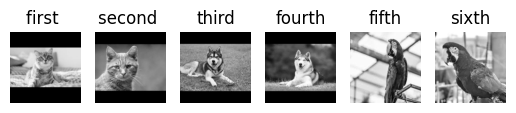

In [7]:
# Initialize the figure
fig =plt.figure("ssim comparison")
images =[("first ", imag1), ("second ", imag2), ("third", imag3), ("fourth", imag4),("fifth", imag5),("sixth", imag6)]

# Loop over the images
for (i, (name, image)) in enumerate(images):
    #show the image
    ax=fig.add_subplot(1,6,i+1)
    plt.imshow(image,cmap=plt.cm.gray)
    plt.axis("off")
    ax.set_title(name)  #set title to image name
plt.show()

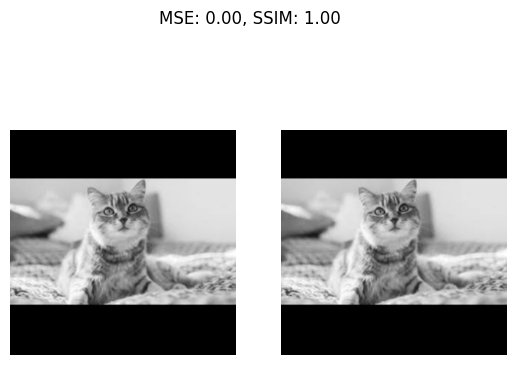

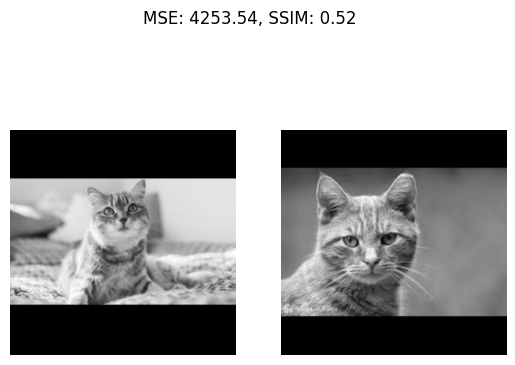

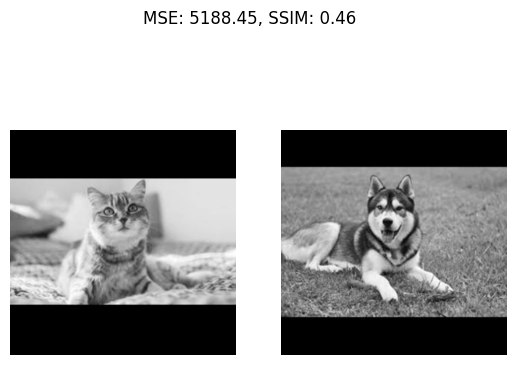

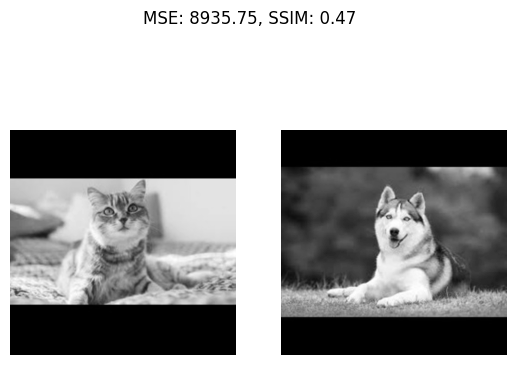

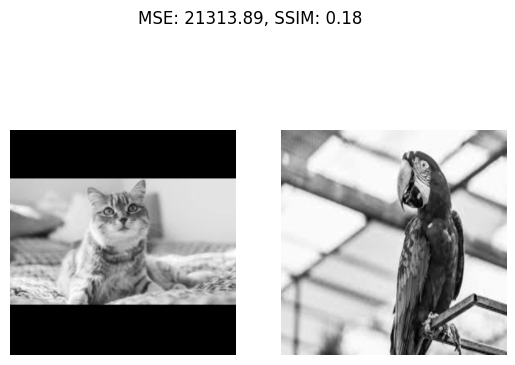

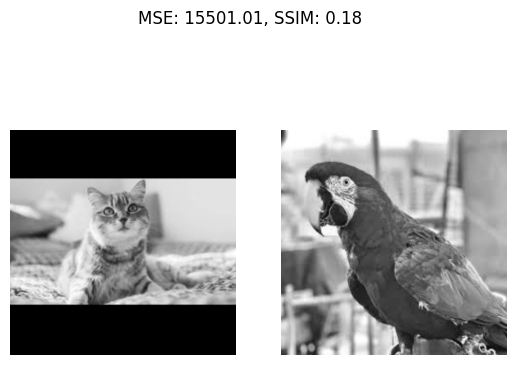

In [8]:
compare_image(imag1,imag1,'same')
compare_image(imag1,imag2,'')
compare_image(imag1,imag3,'')
compare_image(imag1,imag4,'')
compare_image(imag1,imag5,'')
compare_image(imag1,imag6,'')

In [ ]:
from PIL import Image
import imagehash


def hash_to_int(img_hash: imagehash.ImageHash):
    return int(str(img_hash), 16)


def main():
    images = [
        Image.open("c1.png"),
        Image.open("c2.png"),
        Image.open("d1.png"),
        Image.open("d2.png"),
        Image.open("s1.png"),
        Image.open("s2.png")
    ]

    average_hashes = [hash_to_int(imagehash.average_hash(image)) for image in images]
    color_hashes = [hash_to_int(imagehash.colorhash(image)) for image in images]

    image_hashes = list(zip(images, average_hashes, color_hashes))

    source = image_hashes[0]

    for image in image_hashes:
        hamming_average_hash = bin(source[1] ^ image[1]).count("1")
        hamming_color_hash = bin(source[2] ^ image[2]).count("1")
        hamming_distance = hamming_average_hash + hamming_color_hash
        print("Hamming Distance between", source[0].filename, "and", image[0].filename, "is", hamming_distance)


if __name__ == '__main__':
    main()

In [ ]:
import cv2

def compare_images_features(images):

  # Preprocess images (convert to grayscale, optional)
  gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

  # Feature detector and descriptor extractor
  sift = cv2.SIFT_create()

  # Keypoints and descriptors for all images
  all_kps = []
  all_des = []
  for img_gray in gray_images:
    kps, des = sift.detectAndCompute(img_gray, None)
    all_kps.append(kps)
    all_des.append(des)

  # FLANN matcher
  flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))

  # Calculate similarity scores for all image pairs
  similarity_scores = {}
  for i in range(len(images)):
    similarity_scores[i] = {}  # Dictionary for image i's similarities with others
    for j in range(len(images)):
      if i == j:
        continue  # Skip comparing an image to itself
      matches = flann.knnMatch(all_des[i], all_des[j], k=2)
      good_matches = [m for m, n in matches if m.distance < 0.7*n.distance]
      similarity_scores[i][j] = len(good_matches) / len(matches)  # Similarity score

  return similarity_scores

# Example usage
images = [cv2.imread("c1.png"), cv2.imread("c2.png"),
          cv2.imread("d1.png"), cv2.imread("d2.png"),
          cv2.imread("s1.png"), cv2.imread("s2.png")]
similarity_scores = compare_images_features(images)

# Print similarity scores for each image
for image_index, image_scores in similarity_scores.items():
  print(f"Image {image_index+1} similarities:")
  for other_image, score in image_scores.items():
    print(f"\t- Image {other_image+1}: {score}")


In [ ]:
# import the cv2 as well as numpy library
import cv2
import numpy as np
# Create a function that takes two images’ paths as a parameter
def calculate_psnr(firstImage, secondImage):
   # Compute the difference between corresponding pixels
   diff = np.subtract(firstImage, secondImage)
   # Get the square of the difference
   squared_diff = np.square(diff)

   # Compute the mean squared error
   mse = np.mean(squared_diff)

   # Compute the PSNR
   max_pixel = 255
   psnr = 20 * np.log10(max_pixel) - 10 * np.log10(mse)
    
   return psnr

# Resize images to a common size
rHeight = 256
rWidth = 256

# Read the original and distorted images
firstI = cv2.imread('01.png')
secondI = cv2.imread('4qc.png')

# Check if images are loaded successfully
if firstI is None or secondI is None:
   print("Failed to load one or both images.")
else:
   # Resize images for first image
   firstI = cv2.resize(firstI, (rWidth, rHeight))
   # Resize the details for second image
   secondI = cv2.resize(secondI, (rWidth, rHeight))
    
   # Call the above function and perform the calculation
   psnr_score = calculate_psnr(firstI, secondI)
   # Display the result
   print("PSNR:", psnr_score)